In [1]:
using Random
using StatsBase

In [2]:
function generate_data(N)
    # Generate some sample data with known relationship
    θ = randn(N)  # True signal
    n = randn(N)  # Gaussian noise
    ν = 2 * θ + n  # Observed signal with noise
    return θ, ν
end

generate_data (generic function with 1 method)

In [3]:
function lmmse_estimator(y, Cₙₙ, C₀₀, C₀ₙ)
    # Linear Minimum Mean Square Error (LMMSE) Estimator
    # ν: Observed signal
    # Cₙₙ: Autocorrelation matrix of ν
    # C₀₀: Autocorrelation matrix of the true signal θ
    # C₀ₙ: Cross-correlation matrix between θ and ν
    
    # LMMSE Estimator
    H = C₀ₙ / Cₙₙ  # LMMSE filter
    θ̂ = H * y  # Estimated signal
    
    return θ̂
end

lmmse_estimator (generic function with 1 method)

In [4]:
# Example usage
N = 100
θ, ν = generate_data(N)

# Autocorrelation matrices (using a subset to ensure square matrices)

Δ = 0:N-1  # Adjust the lags appropriately
Cₙₙ  = autocor(ν, Δ)
C₀₀ = autocor(θ, Δ)
C₀ₙ = crosscor(θ, ν, Δ);

In [5]:
# LMMSE Estimation
θ̂ₗₘₛₛₑ = lmmse_estimator(ν, Cₙₙ, C₀₀, C₀ₙ);

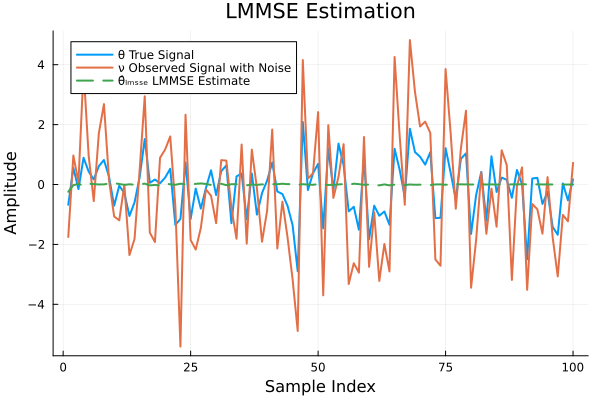

In [6]:
# Display the results
using Plots
plot(θ, label="θ True Signal", linewidth=2, legend=:topleft)
plot!(ν, label="ν Observed Signal with Noise", linewidth=2)
plot!(θ̂ₗₘₛₛₑ, label="θ̂ₗₘₛₛₑ LMMSE Estimate", linestyle=:dash, linewidth=2)
xlabel!("Sample Index")
ylabel!("Amplitude")
title!("LMMSE Estimation")

In [15]:
function blue_estimator(y, Θ)
    # Best Linear Unbiased Estimator (BLUE)
    # y: Observed signal
    # Θ: Design matrix
    
    # Estimate coefficients using least squares
    β = Θ \ y
    
    # Estimated signal
    θ̂ = Θ * β
    
    return θ̂
end

blue_estimator (generic function with 1 method)

In [16]:
# Design matrix
Θ = hcat(ones(N), θ);  # Assuming a simple linear model, [1, θ]

In [17]:
# BLUE Estimation
θ̂ᵦₗᵤₑ = blue_estimator(ν, Θ);

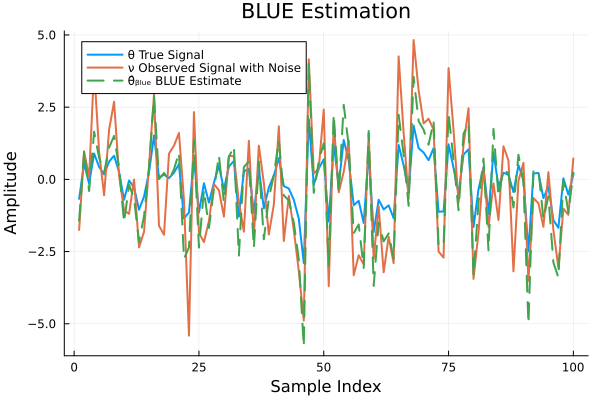

In [18]:
# Display the results
plot(θ, label="θ True Signal", linewidth=2, legend=:topleft)
plot!(ν, label="ν Observed Signal with Noise", linewidth=2)
plot!(θ̂ᵦₗᵤₑ, label="θ̂ᵦₗᵤₑ BLUE Estimate", linestyle=:dash, linewidth=2)
xlabel!("Sample Index")
ylabel!("Amplitude")
title!("BLUE Estimation")